<a href="https://colab.research.google.com/github/kamfur/machine-learing-python/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

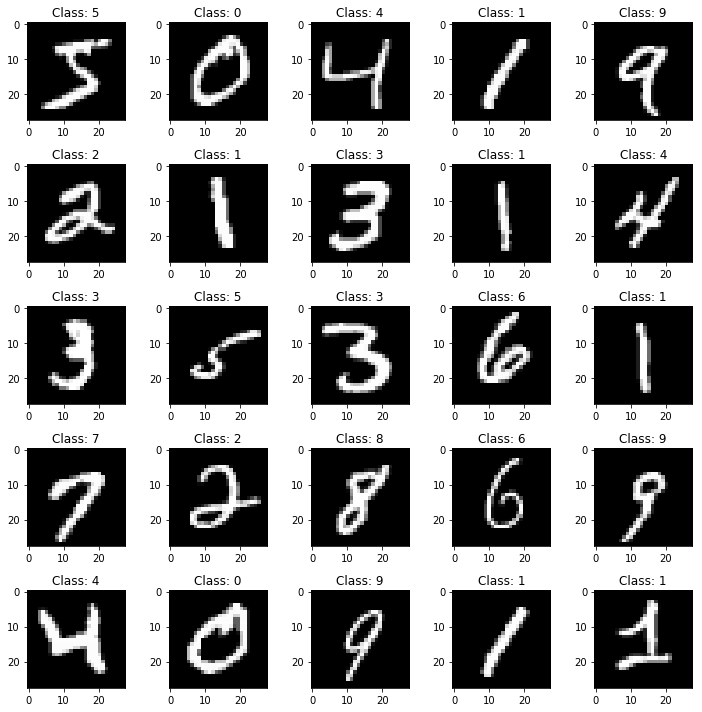

In [0]:
plt.figure(figsize=(10,10))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title('Class: {}'.format(y_train[idx]))
plt.tight_layout()

In [0]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols,1)

input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

przekształcenie 0...255 na 0...1

In [0]:
if np.max(X_train) > 1 : X_train = X_train /255
if np.max(X_test) > 1 : X_test = X_test /255

przekształcenie y_train
5 = > [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [0]:
if len(y_train.shape) == 1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)


In [0]:
if len(y_test.shape) == 1:
    num_classes = len(set(y_test))
    y_test = to_categorical(y_test, num_classes)

In [0]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape = input_shape),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3)),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# Trenowanie

In [0]:
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=3,
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1720 - acc: 0.9483 - val_loss: 0.0421 - val_acc: 0.9875
Epoch 2/3
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0451 - acc: 0.9859 - val_loss: 0.0378 - val_acc: 0.9874
Epoch 3/3
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0284 - acc: 0.9909 - val_loss: 0.0371 - val_acc: 0.9889


# Testowanie

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

In [0]:
score

[0.03712996592730051, 0.9889]